In [1]:
import os
from PIL import Image, ImageOps
import PIL
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image, ImageOps
import random

from IPython.display import FileLink, FileLinks

# Image Processing

In deze notebook gaan we twee dingen doen, kijken wat er gebeurd na met de afbeelding na een transformatie en hoe je deze kan aanroepen. Dit doen we eerst met Pillow (gemakkelijke manier van inladen en tonen afbeelding), gevolgd door pytorch (waarmee we werken in het trainen van modellen).

In [4]:
folder_path = "..\\images\\selfmade_data\\Appel"

In [5]:
file_name = "WIN_20241211_14_57_45_Pro.jpg"

In [6]:
image_path = os.path.join(folder_path, file_name)

#### Openen Afbeelding

In [8]:
image = Image.open(image_path)

In [9]:
# Convert image to numpy array
image_rgb = image.convert("RGB")

Zowel `image` als `image_rgb` bevatten de afbeelding, zou je simpelweg de variable aanroepen krijg je al een weergave van de afbeelding. Maar aangezien de grootte van de afbeelding en je mogelijk andere informatie ook wilt meegeven is onderstaande methode gebruikelijker.

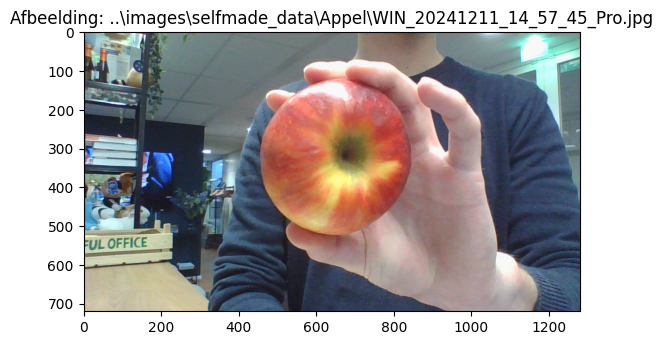

In [11]:
# Create figure and axis
fig, ax = plt.subplots(1)
ax.imshow(image_rgb)
plt.title(f"Afbeelding: {image_path}")
# plt.axis('off')
plt.show()

## Sampling
Voor we gaan normaliseren is het verstandig om eerst een correcte klasse verdeling te hebben. Door under of oversampling kunnen we deze klasse verdeling gelijker maken.

In [13]:
FileLink("over-under sampling.ipynb")

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\code\over-under sampling.ipynb

### Normaliseren
Dit is het schalen van afbeeldingen naar een bereik tussen de 0 en 1 of -1 en 1. Door de input values in het zelfde bereik te zetten als de neurons gaat het train process sneller, verder helpt dit ook voor een goed trainprocess per batch, [meer over normaliseren](https://inside-machinelearning.com/en/why-and-how-to-normalize-data-object-detection-on-image-in-pytorch-part-1/). Een perfect genormaliseerde dataset heeft voor elke RGB value een gemiddelde van 0 en een standaard afwijking van 1. (Dit is niet noodzakelijk) Aangezien vaak het bereik van de pixelwaardes tussen de 0-255 ligt is simpelweg elke pixelwaarde delen door 255 een goede optie.

In [15]:
image_np = np.array(image_rgb)
image_np[:1][:1]

array([[[106, 154, 166],
        [105, 151, 164],
        [106, 152, 165],
        ...,
        [111, 147, 143],
        [112, 147, 143],
        [112, 146, 145]]], dtype=uint8)

In [16]:
normalised_img = image_np / 255
normalised_img[:1][:1]

array([[[0.41568627, 0.60392157, 0.65098039],
        [0.41176471, 0.59215686, 0.64313725],
        [0.41568627, 0.59607843, 0.64705882],
        ...,
        [0.43529412, 0.57647059, 0.56078431],
        [0.43921569, 0.57647059, 0.56078431],
        [0.43921569, 0.57254902, 0.56862745]]])

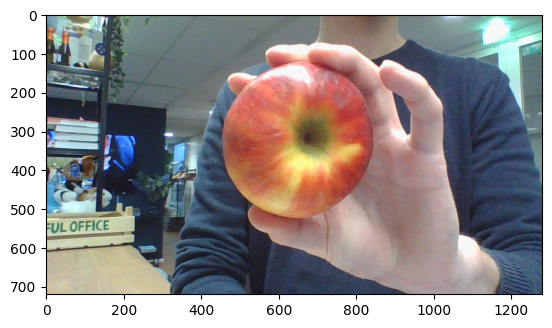

In [17]:
plt.imshow(normalised_img)

Ondanks dat de waardes anders zijn is het nog niet aan de afbeelding te zien.

### ResNet50 Normalisatie
Bij pre-trained modellen zijn vaak deze waardes al bepaald voor de dataset waarop het is getraind. In onderstaande geval normaliseren we op basis van de ResNet50 gemiddeldes en standaard afwijkingen.

In [20]:
# Definieer de gemiddelde en standaardafwijking voor de RGB-kanalen
mean = [0.485, 0.456, 0.406]  # Vooraf gedefinieerde waarden die vaak worden gebruikt voor ImageNet-pretraining
std = [0.229, 0.224, 0.225]   # Standaardafwijking voor de RGB-kanalen

# Definieer de transformaties, inclusief normalisatie
transform = transforms.Compose([
    transforms.ToTensor(),  # Zet de afbeelding om naar een tensor met waarden in [0, 1]
    transforms.Normalize(mean=mean, std=std)  # Normaliseer met de gemiddelde en standaardafwijking
])

# Pas de transformatie toe op de afbeelding
image_tensor = transform(image)

print(image_tensor)

tensor([[[-0.3027, -0.3198, -0.3027,  ..., -0.2171, -0.1999, -0.1999],
         [-0.3198, -0.3369, -0.2856,  ..., -0.1999, -0.1828, -0.1828],
         [-0.3027, -0.3027, -0.2684,  ..., -0.1657, -0.1657, -0.1657],
         ...,
         [ 1.3070,  1.3242,  1.3584,  ..., -1.0562, -1.0904, -1.1075],
         [ 1.2899,  1.3242,  1.3584,  ..., -1.0219, -1.0904, -1.1589],
         [ 1.3070,  1.3242,  1.3584,  ..., -0.9705, -1.0562, -1.1418]],

        [[ 0.6604,  0.6078,  0.6254,  ...,  0.5378,  0.5378,  0.5203],
         [ 0.6429,  0.5903,  0.6078,  ...,  0.5553,  0.5553,  0.5553],
         [ 0.6254,  0.6254,  0.6254,  ...,  0.5903,  0.5903,  0.5728],
         ...,
         [ 1.2731,  1.2906,  1.2731,  ..., -0.6001, -0.6352, -0.6527],
         [ 1.2731,  1.2731,  1.2731,  ..., -0.5476, -0.6176, -0.6877],
         [ 1.2906,  1.2731,  1.2731,  ..., -0.4951, -0.5651, -0.6527]],

        [[ 1.0888,  1.0539,  1.0714,  ...,  0.6879,  0.6879,  0.7228],
         [ 1.0714,  1.0365,  1.0539,  ...,  0

#### Eigen mean en std

In het algemeen is het prima om deze waardes te gebruiken maar als je een grote dataset hebt en andere klassen dan waar het model op is getraind raad ik aan je eigen gemiddelde en standaard afwijking berekeningen te doen. 
[online discussion](https://discuss.pytorch.org/t/should-we-use-our-normalization-for-training-a-pretrained-model/34905)

In [23]:
# Definieer de transformaties voor de afbeeldingen
transform = transforms.Compose([
    transforms.ToTensor()  # Zet afbeeldingen om naar PyTorch tensors
])

In [24]:
# Laad de dataset in - stel de juiste pad van je afbeeldingen in
dataset = datasets.ImageFolder(root='..\\images\\selfmade_data', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

##### Simpel berekenen
We alle pixelwaardes in een lijst bij elkaar te zetten.

In [26]:
# # Initialiseer lijsten om alle pixelwaarden in op te slaan
# all_pixels = torch.cat([data[0].view(3, -1) for data, _ in dataloader], dim=1)

Dit kon de kernel echter niet aan en zorgde er voor het crashte.

In [28]:
# # Bereken het gemiddelde en de standaardafwijking per kanaal (R, G, B)
# mean = all_pixels.mean(dim=1)
# std = all_pixels.std(dim=1)

In [29]:
# print("Mean:", mean)
# print("Standard Deviation:", std)

*(Het is mogelijk de code te runnen mogelijk werkt het op jou apparaat wel.)*

##### Crash Bestendig
Een andere mogelijkheid om het gemiddelde en de standaardafwijking te berekenen is 

In [32]:
# Initialiseer een lege array voor de som en het kwadraat van de som van pixelwaarden
mean_sum = torch.zeros(3)
squared_mean_sum = torch.zeros(3)
num_batches = 0

In [33]:
# Loop door de dataloader om het gemiddelde en de variatie te berekenen
for data, _ in dataloader:
    # Verkrijg het aantal pixels per batch (aantal afbeeldingen x hoogte x breedte)
    num_pixels = data.size(0) * data.size(2) * data.size(3)
    mean_sum += data.sum(dim=[0, 2, 3])
    squared_mean_sum += (data ** 2).sum(dim=[0, 2, 3])
    num_batches += num_pixels

- **data**: Dit is een batch van afbeeldingen uit de dataloader. De dimensies van `data` zijn doorgaans `(batch_size, channels, height, width)`. Dus als je een batch van 32 RGB-afbeeldingen met een resolutie van 224x224 hebt, dan is `data` van vorm `(32, 3, 224, 224)`.

- **dim=[0, 2, 3]**: We specificeren langs welke dimensies we willen samenvoegen (optellen) om de som van de waarden te verkrijgen. Hier is een overzicht:
  - `dim=0` verwijst naar de batch-dimensie. Door deze te specificeren, voeg je de waarden samen over alle afbeeldingen in de batch.
  - `dim=2` verwijst naar de hoogte (`height`) van de afbeelding.
  - `dim=3` verwijst naar de breedte (`width`) van de afbeelding.

In [36]:
# Bereken het gemiddelde en de variantie
mean = mean_sum / num_batches
std = torch.sqrt(squared_mean_sum / num_batches - mean ** 2)

In [37]:
print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor([0.5146, 0.5071, 0.5064])
Standard Deviation: tensor([0.1779, 0.1722, 0.1627])


Nu we onze eigen `mean` en `std` hebben kunnen we deze gebruiken in de normalize transformatie. (Dit gaan we ook doen tijdens het model trainen.)

In [40]:
# Definieer de transformaties, inclusief normalisatie
transform = transforms.Compose([
    transforms.ToTensor(),  # Zet de afbeelding om naar een tensor met waarden in [0, 1]
    transforms.Normalize(mean=mean, std=std)  # Normaliseer met de gemiddelde en standaardafwijking
])

In [41]:
# Pas de transformatie toe op de afbeelding
image_tensor = transform(image)

print(image_tensor)

tensor([[[-0.5563, -0.5784, -0.5563,  ..., -0.4461, -0.4241, -0.4241],
         [-0.5784, -0.6004, -0.5343,  ..., -0.4241, -0.4020, -0.4020],
         [-0.5563, -0.5563, -0.5122,  ..., -0.3800, -0.3800, -0.3800],
         ...,
         [ 1.5160,  1.5381,  1.5822,  ..., -1.5264, -1.5705, -1.5925],
         [ 1.4940,  1.5381,  1.5822,  ..., -1.4823, -1.5705, -1.6587],
         [ 1.5160,  1.5381,  1.5822,  ..., -1.4161, -1.5264, -1.6366]],

        [[ 0.5621,  0.4938,  0.5165,  ...,  0.4027,  0.4027,  0.3799],
         [ 0.5393,  0.4710,  0.4938,  ...,  0.4254,  0.4254,  0.4254],
         [ 0.5165,  0.5165,  0.5165,  ...,  0.4710,  0.4710,  0.4482],
         ...,
         [ 1.3593,  1.3821,  1.3593,  ..., -1.0778, -1.1234, -1.1461],
         [ 1.3593,  1.3593,  1.3593,  ..., -1.0095, -1.1006, -1.1917],
         [ 1.3821,  1.3593,  1.3593,  ..., -0.9412, -1.0323, -1.1461]],

        [[ 0.8883,  0.8401,  0.8642,  ...,  0.3341,  0.3341,  0.3823],
         [ 0.8642,  0.8160,  0.8401,  ...,  0

#### Data Augmentatie

Data-augmentatie is een krachtige techniek om de generalisatiecapaciteiten van machine learning-modellen te verbeteren door het kunstmatig vergroten van de trainingsset. Hier is een lijst van veelgebruikte data-augmentatie transformaties die beschikbaar zijn in `torchvision.transforms`, samen met een uitleg van wat ze doen:

**`transforms.Normalize(mean, std)`**: Normaliseert een tensorbeeld met de gegeven gemiddelde en standaardafwijking. Elke kanaal van de inputtensor wordt onafhankelijk genormaliseerd.

**`transforms.Resize(size)`**: Creeert een versie van de afbeelding met de gegeven grootte. De grootte kan ofwel een int of een tuple van ints zijn (hoogte, breedte).

**`transforms.Grayscale(num_output_channels=1)`**: Zet het beeld om naar grijswaarden. Als `num_output_channels=1`, dan wordt een enkel kanaal geretourneerd, anders worden de kanalen gerepliceerd.

**`transforms.RandomHorizontalFlip(p=0.5)`**: Spiegelt het beeld horizontaal met een gegeven waarschijnlijkheid `p` (standaard 0.5, oftewel 50% kans).

**`transforms.RandomVerticalFlip(p=0.5)`**: Spiegelt het beeld verticaal met een bepaalde waarschijnlijkheid.

**`transforms.RandomRotation(degrees)`**: Draaien van het beeld met een willekeurige hoek die wordt gekozen uit het interval (-degrees, degrees).

**`transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)`**: Past de helderheid, het contrast, de verzadiging en de kleurtint aan. Elke parameter kan een enkelvoudige waarde zijn of een tuple om een variatiebereik te specificeren.

**`transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(3.0/4.0, 4.0/3.0))`**: Snijdt een willekeurig gedeelte van het beeld uit met een willekeurige schaal en beeldverhouding, en resize het naar de opgegeven grootte.

**`transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)`**: Toepassen van willekeurige affine transformaties zoals rotatie, translatie, schaal en shear op het beeld.

**`transforms.RandomGrayscale(p=0.1)`**: Zet het beeld om naar grijswaarden met een kans `p`.

**`transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3)`**: Past een willekeurige perspectieftransformatie toe, waarbij `distortion_scale` bepaalt hoe sterk de vervorming kan zijn.

**`transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0)`**: Willekeurig geselecteerde rechthoekige regio's van een afbeelding worden gewist tijdens de trainingsfase.

**`transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')`**: Snijdt een willekeurig gedeelte van het beeld uit met een gegeven grootte. Optioneel kan padding worden toegevoegd voordat er wordt gesneden.

**`transforms.CenterCrop(size)`**: Snijdt het centrale gedeelte van het beeld uit naar de opgegeven grootte.


### Eigen Augmentaties
Buiten de bestaande transformaties is het ook mogelijk zelf deze te maken als je iets specifieks in beelt hebt.

Hieronder combineren we resize en rotation om een resultaat te krijgen wat meer past bij wat we zoeken

In [46]:
class SquarePad:
    def __call__(self, image):
        # Voeg padding toe om de afbeelding vierkant te maken
        max_size = max(image.size)
        pad_x = (max_size - image.size[0]) // 2
        pad_y = (max_size - image.size[1]) // 2
        padding = (pad_x, pad_y, max_size - image.size[0] - pad_x, max_size - image.size[1] - pad_y)
        return ImageOps.expand(image, padding, fill=0)  # Vul de padding met zwarte rand

In [47]:
class ResizeWithRotation:
    def __init__(self, size, rotate_angle):
        self.size = size
        self.rotate_angle = rotate_angle

    def __call__(self, image):
        # Roteer de afbeelding
        rotated_image = image.rotate(self.rotate_angle, expand=True, fillcolor=(0, 0, 0))

        # Voeg vierkante padding toe
        padded_image = SquarePad()(rotated_image)

        # Verander van grootte zonder te croppen
        return padded_image.resize((self.size, self.size), resample=Image.Resampling.LANCZOS)

In [48]:
class ResizeWithRandomRotation:
    def __init__(self, size, max_rotate_angle):
        self.size = size
        self.max_rotate_angle = max_rotate_angle

    def __call__(self, image):
        # Genereer een willekeurige rotatiehoek tussen 0 en max_rotate_angle
        random_angle = random.uniform(0, self.max_rotate_angle)

        # Roteer de afbeelding met de willekeurige hoek
        rotated_image = image.rotate(random_angle, expand=True, fillcolor=(0, 0, 0))

        # Voeg vierkante padding toe
        padded_image = SquarePad()(rotated_image)

        # Verander van grootte zonder te croppen
        return padded_image.resize((self.size, self.size), resample=Image.Resampling.LANCZOS)

In [49]:
transform = transforms.Compose([
    # ResizeWithRotation(224, 45),  # Bijvoorbeeld een rotatie van 45 graden en daarna aanpassen naar 224x224
    ResizeWithRandomRotation(224, 180),
])

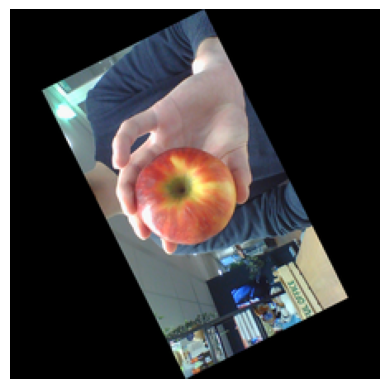

In [50]:
test_image = Image.open(image_path)
transformed_image = transform(test_image)

# Gebruik matplotlib om de afbeelding weer te geven
plt.imshow(transformed_image)
plt.axis('off')  # Optioneel: verberg de assen
plt.show()